In [1]:
# Run this cell to import the modules and set up some stuff
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]
import warnings
warnings.filterwarnings('ignore')
import collections
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np

# Group 1 - Data Mining and Data Science project

By Farhad Rezai, Linus Huzell, Saga Rudolphi, Philip Öhlund. Submitted on 28 nov. 2018.

Link to this notebook on github: https://github.com/philipohlund/2IS063_project

## 1. Background

The organisation chosen for this project is a fictional movie production company in the film industry that is creating and directing new movies. The typical working process for the company is as follow. They choose a work, or an idea, and get the full rights to it. Then they put the crew together, consisting of writer, director and actors. When all this is done they reach out to investors to get the money needed to produce the film. Then they create the film and sell it to theatres and resellers.

In recent years, the company has not used any specific strategy for movie production. They have tried to guess what kind of movies people like and from that invested huge financial capital in the production. Then they have put the crew together without making any major analysis in advance. This strategy has only managed to produce a few successful movies, but the majority of all produced films are at a loss. The company has repeatedly tried to find a pattern for those movies that are profitable and sell well but has not succeeded yet. Eventually, they came to a point where they realised that their current strategy is not working well enough. If they continue as they do, they risk being bankrupt in the near future. Their next movie could be crucial for the company's survival.

One of the factors that may increase the chance of a movie to be successful is that it has high ratings on IMDb. Many film companies use IMDB to find best-selling movies, therefore, high rated movies have a greater chance of generating profits (Meenakshi et al., 2018). As a consequence, the company's primary goal is to get the best possible rating on their movies on IMDb. 

## 2. Problem description

### 2.1 Problem description

The company has released several movies but none of them has been particularly successful. For their next movie, the aim is to make a bestseller, or at least more profitable, to get the company back on track again. This time they want to make an analysis of what factors they should take into account before starting the creation process of the movie. They want to find out what is most important to allocate their financial resources too, to optimise and improve the success rate of the film. This in turn to increase the monetary results of the film and reach their goal. 

It is difficult to say what aspects of a movie that are the most crucial factors of defining a movie as good (Oliver and Hartman, 2010). In addition to this, as Sharda and Delen (2006) explain that it is also very difficult to predict the demand for a movie in advance. Therefore this makes the movie business one of the riskiest endeavours for investors. There are even people claiming that it is not possible to predict how a movie is going to do in the marketplace (Sharda and Delen, 2006). As Jack Valenti, the former president of Motion Picture Association of America once said: “Excellence is a fragile substance and movie making is a collaboration of talent, which is why it is hard to make and buy great films.”  (Valenti, 1978). He is entitled that talent is required for making a good movie, as movies are subject to subjective judgment by the viewers (1978). However, with the help of new technologies and methods, it could be possible to “hack” the normal way of producing movies to increase the chances of being successful (1978).

This project will look into if it is possible to, through data mining, do an analysis of the data of movies available at IMDb. They are, the length of the movie, actors, writer and director. Then, based on these, see if there are any factors that can increase the chances of producing a highly rated movie. 

### 2.2 Research questions
	
Based on the above this report will answer the following question:

*What factors have the biggest impact on the success of a movie at IMDb?*

### 2.3 Hypothesis

To answer the question being asked, this research will look at factors that are believed to play a great role if the movie will get a high grade from the people watching it or not. The hypothesis is based on the data available through IMDb. The factors that will be analysed is the movie’s running time, the actors in it, the writer and the director.

#### Running time
It is not certain if previous researches have included a movie’s running time as a success factor for a movie. However, this could be interesting to look at. It is not impossible to think that the length has some impact on the viewers. Perhaps a too long movie will make the audience lose their concentration, or if it is too short they do not have time to fully get into the movie. 

#### Writers
The writers often, in comparison to actors and directors, tend to be quite anonymous in relation to their films. And as Batty (2015) describes, there is a lack of screen production research which means that this area may contain gaps. Nevertheless this is an interesting factor to look at in relation to the movie’s success rate, but in the end, we think that writers should not have any significant effect on our result.

#### Actors
When others have tried to analyse the factors of a movie’s success many of them have looked into the impact of the stars of the movie (Lee et. al, 2016). That is, the actors. Lee et. al (2014) are using a measurement of “star buzz” in their analysis of a successful movie. Since many other surveys of movies are using this as a factor, and even though it has shown a mixed result, it seems like a factor that should be considered. It is also not difficult to imagine that a movie with a popular actor with many fans gets high rated just because the actor is acting in it. 

#### Director
The director of the movie is likely to have an impact on the success rate. Parkeh and Biswas (2015) are analysing the factors that have the most impact on movies in certain genres. Their results show that in all of the six genres, the directing is one of the driving factors. Therefore this factor will be used in this report as well. The difference in this research is that the aim is to find the names of the directors that often create successful movies. 

## 3. Data collection

### 3.1 Data Collection

The data used for the analysis will be user rating data from IMDb. This data is free and can be obtained from IMDB (imdb.com, 2018) with its documentation available at https://www.imdb.com/interfaces/. The datasets contain complete user rating data from IMDb and in addition to the rating, it contains additional information about the movie's writer, director and actors. The information selected is considered relevant enough to get useful results for the movie company.

IMDb is used as the primary source for this project because of the following reasons: IMDb provides a large movie set that is open to all users, which has information related to movie ratings, movie genres, actors, directors and writers.
Movies on IMDb are exposed to a large number of people. At present, IMDb has about 83 million registered users (IMDb.com). IMDb does not have a complete dataset, it lacks information about movie budget, revenue and other important factors, but the information available is considered sufficient for the purpose of this project.

### 3.2 Datasets/Tables

For the analysis four different datasets will be downloaded from IMDb, these are: “Title Basics”, “Title Ratings”, “Title Principals” and “Title Crew”. Note that it could take a few minutes to load the datasets below.

- “Title Basics” contains basic information related to the movie title and the columns that will be used from this table are “tconst”, “titleType”, “primaryTitle”, “startYear” and “runtimeMinutes”.

In [2]:
title_basics = pd.read_csv(
    "https://datasets.imdbws.com/title.basics.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'titleType': str, 'primaryTitle': str, 'originalTitle': str, 'isAdult': int, 'startYear': str, 'endYear': str, 'runtimeMinutes': str, 'genres': str}
)

- “Title Ratings” contains the actual information about the ratings for each title and the columns that will be used for this table are “tconst”, “averageRating” and “numVotes”.

In [3]:
title_ratings = pd.read_csv(
    "https://datasets.imdbws.com/title.ratings.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'averageRating': float, 'numVotes': int}
)

- “Title Principals” contains information about the principal people related to every movie. The columns that will be used are “tconst”, “ordering”, “nconst” and “category”.

In [4]:
title_principals = pd.read_csv(
    "https://datasets.imdbws.com/title.principals.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'ordering': int, 'nconst': str, 'category': str, 'job': str, 'characters': str}
)

- “Title Crew” contains information about the writers and directors of a movie. The columns that will be used are “tconst”, “directors” and “writers”.

In [5]:
title_crew = pd.read_csv(
    "https://datasets.imdbws.com/title.crew.tsv.gz", 
    encoding="utf-8", sep="\t", 
    dtype={'tconst': str, 'directors': str, 'writers': str}
)

### 3.3 Data dictionary

- `tconst` - Alphanumeric unique identifier of the title
- `titleType` - The type/format of the title (e.g. movie, short, tvseries etc)
- `primaryTitle` - The more popular title / the title used by the filmmakers on promotional materials at the point of release
- `startYear` - Represents the release year of a title
- `runtimeMinutes` - Total minutes of the movie’s runtime
- `averageRating` - Weighted average of all the individual user ratings
- `numVotes` - Number of votes the title has received
- `ordering` - Order of the related cast/crew for a movie
- `nconst` - Alphanumeric unique identifier of the name/person
- `category` - The category of job the person was in (e.g. "actor" or "actress")
- `successful` - Whether the movie is successful or not (0 = No, 1 = Yes)
- `actor1` - Name of the first actor in the ordering of a given title
- `actor2` - Name of the second actor in the ordering of a given title
- `directors` - Name of the director in the ordering of a given title
- `writers` - Name of the writer in the ordering of a given title

### 3.4 Preprocessing

Since the datasets are very big, an initial filtering needs to be done to get only the information that is relevant. The movie company wants to create a modern movie, therefore movies made before 2000 will be left out. We made an assessment not to include movies with less than 1000 votes to give a fair review. This creates a new dataset that still contains much data but only relevant data that is easier to handle. We are also adding an additional attribute, called "successful". Finally, we remove all null values.

First we only keep the relevant columns:

In [6]:
title_basics = title_basics[['tconst', 'titleType', 'primaryTitle', 
                             'startYear', 'runtimeMinutes', 'genres']]
title_principals = title_principals[['tconst', 'ordering', 'nconst', 'category']]

We filter out only the movies from the year 2000 and until 2017 and keep them (the output shows the first 5 rows of the table):

In [7]:
title_basics_filtered = title_basics[title_basics.titleType == "movie"]
title_basics_filtered = title_basics_filtered[title_basics_filtered.startYear >= "2000"]
title_basics_filtered = title_basics_filtered[title_basics_filtered.startYear <= "2017"]
title_basics_filtered = title_basics_filtered[['tconst', 'primaryTitle', 
                             'startYear', 'runtimeMinutes', 'genres']]
title_basics_filtered.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres
34822,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance"
65547,tt0066853,Na Boca da Noite,2016,68,Drama
86845,tt0088751,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi"
92819,tt0094859,Chief Zabu,2016,74,Comedy
93991,tt0096056,Crime and Punishment,2002,126,Drama


We filter out all ratings with at least 1000 votes:

In [8]:
title_ratings_filtered = title_ratings[title_ratings['numVotes'] >= 1000]
title_ratings_filtered.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1440
2,tt0000003,6.6,1041
4,tt0000005,6.2,1737
7,tt0000008,5.6,1539
9,tt0000010,6.9,5133


In [9]:
movies_ratings = pd.merge(title_basics_filtered, title_ratings_filtered, on='tconst')
movies_ratings.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423


In [10]:
movies_ratings_crew = pd.merge(movies_ratings, title_crew, on='tconst')
movies_ratings_crew.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509,nm0003506,"nm0737216,nm0003506"
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534,nm0193554,"nm0921985,nm0486824"
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532,nm0440948,nm0551138
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277


Below we add an attribute for whether the movie is successful. A movie is considered to be successful if the average rating is 7.0 or above. The top 250 movies on IMDb have the rating of 8.0 and therefore we decided that 7.0 was a good limit. 

`1` means that the movie is successful and `0` means that it is not.

In [11]:
movies_ratings_crew['successful'] = np.where(movies_ratings_crew['averageRating'] >= 7.0, 1, 0)
movies_ratings_crew.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509,nm0003506,"nm0737216,nm0003506",0
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534,nm0193554,"nm0921985,nm0486824",0
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532,nm0440948,nm0551138,0
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182,1
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1


Number of successful movies:

In [12]:
movies_ratings_crew.successful.value_counts()

0    10733
1     4770
Name: successful, dtype: int64

Delete movies without a runtime (note that the number of entries and non-null objects are the same afterwards):

In [13]:
for i, row in movies_ratings_crew.iterrows():
    if movies_ratings_crew.at[i,'runtimeMinutes'] == r"\N" or movies_ratings_crew.at[i,'runtimeMinutes'] == r"\\N":
        movies_ratings_crew.at[i,'runtimeMinutes'] = None

movies_ratings_crew = movies_ratings_crew.dropna(subset=['runtimeMinutes'])

movies_ratings_crew['runtimeMinutes'] = movies_ratings_crew['runtimeMinutes'].astype(int)
movies_ratings_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15454 entries, 0 to 15502
Data columns (total 10 columns):
tconst            15454 non-null object
primaryTitle      15454 non-null object
startYear         15454 non-null object
runtimeMinutes    15454 non-null int32
genres            15454 non-null object
averageRating     15454 non-null float64
numVotes          15454 non-null int32
directors         15454 non-null object
writers           15454 non-null object
successful        15454 non-null int32
dtypes: float64(1), int32(3), object(6)
memory usage: 1.1+ MB


Delete movies without directors or writers (null values):

In [14]:
movies_ratings_crew['directors'] = movies_ratings_crew['directors'].replace(r'\N', np.nan)
movies_ratings_crew = movies_ratings_crew.dropna(axis=0, subset=['directors'])

movies_ratings_crew['writers'] = movies_ratings_crew['writers'].replace(r'\N', np.nan)
movies_ratings_crew = movies_ratings_crew.dropna(axis=0, subset=['writers'])

movies_ratings_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15020 entries, 0 to 15502
Data columns (total 10 columns):
tconst            15020 non-null object
primaryTitle      15020 non-null object
startYear         15020 non-null object
runtimeMinutes    15020 non-null int32
genres            15020 non-null object
averageRating     15020 non-null float64
numVotes          15020 non-null int32
directors         15020 non-null object
writers           15020 non-null object
successful        15020 non-null int32
dtypes: float64(1), int32(3), object(6)
memory usage: 1.1+ MB


Get only the first director and writer:

In [15]:
for i, row in movies_ratings_crew.iterrows():
      movies_ratings_crew.at[i,'directors'] = movies_ratings_crew.at[i,'directors'].split(',')[0]

In [16]:
for i, row in movies_ratings_crew.iterrows():
      movies_ratings_crew.at[i,'writers'] = movies_ratings_crew.at[i,'writers'].split(',')[0]

In [17]:
movies_ratings_crew.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509,nm0003506,nm0737216,0
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534,nm0193554,nm0921985,0
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532,nm0440948,nm0551138,0
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182,1
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1


Most movies have multiple actors so to make everything manageable, we have chosen to have the top two actors for each movie:

In [18]:
#Get actor 1
title_principals_filtered = title_principals[(title_principals.category == "actor") | (title_principals.category == "actress")]
title_principals_filtered = title_principals_filtered[title_principals_filtered.ordering == 1]
title_principals_filtered = title_principals_filtered[title_principals_filtered['tconst'].isin(movies_ratings_crew['tconst'])]
title_principals_filtered = title_principals_filtered[['tconst', 'nconst']]

movies_ratings_crew_actors = pd.merge(movies_ratings_crew, title_principals_filtered, on='tconst')
movies_ratings_crew_actors = movies_ratings_crew_actors.rename(columns={'nconst': 'actor1'})
movies_ratings_crew_actors.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful,actor1
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509,nm0003506,nm0737216,0,nm0000212
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534,nm0193554,nm0921985,0,nm0001014
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532,nm0440948,nm0551138,0,nm0427470
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182,1,nm0504897
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199


In [19]:
#Get actor 2
title_principals_filtered = title_principals[(title_principals.category == "actor") | (title_principals.category == "actress")]
title_principals_filtered = title_principals_filtered[title_principals_filtered.ordering == 2]
title_principals_filtered = title_principals_filtered[title_principals_filtered['tconst'].isin(movies_ratings_crew['tconst'])]
title_principals_filtered = title_principals_filtered[['tconst', 'nconst']]

movies_ratings_crew_actors = pd.merge(movies_ratings_crew_actors, title_principals_filtered, on='tconst')
movies_ratings_crew_actors = movies_ratings_crew_actors.rename(columns={'nconst': 'actor2'})
movies_ratings_crew_actors.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful,actor1,actor2
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509,nm0003506,nm0737216,0,nm0000212,nm0413168
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534,nm0193554,nm0921985,0,nm0001014,nm0073160
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532,nm0440948,nm0551138,0,nm0427470,nm0001293
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583


Then we create a table of only successful movies:

In [20]:
successful_movies = movies_ratings_crew_actors[movies_ratings_crew_actors.successful == 1]
successful_movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful,actor1,actor2
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583
5,tt0118926,The Dancer Upstairs,2002,132,"Crime,Drama,Thriller",7.0,6013,nm0000518,nm0787649,1,nm0000849,nm0603090
9,tt0120263,Songs from the Second Floor,2000,98,"Comedy,Drama",7.7,15188,nm0027815,nm0027815,1,nm0635070,nm0489281
11,tt0120626,April Captains,2000,123,"Drama,History,War",7.1,2630,nm0210218,nm0210218,1,nm0009629,nm0210218


## 4. Method and data analysis
### 4.1 Method

The method chosen for this analysis is classification and the technique used is the decision tree classifier. A decision tree is a methodology to reach a final conclusion by taking a complex decision and divide it into easier decisions (Safian, Landgrebe, 1991). By asking questions about the attributes, and then supplementary questions, in a hierarchical way, a decision or conclusion will finally be reached (Steinbach Kumar, 2014). A tree has three types of nodes, root node, internal nodes and leafs (2014). When asking questions and receiving answers a path will follow the nodes until a leaf is reached and that is where the final decision or conclusion is being made (2014).

This technique will enable the possibilities to do a prediction if a movie will get a high rating or not by asking questions and following the nodes to see whether the movie fulfils all the criteria to become a highly rated movie. 

### 4.2 Analysis
#### Actors

In this section the actors will be rated based on the number of successful movies they have participated in and their total number of movies.

Counts all actors that participated in at least one movie:

In [21]:
actors = pd.concat([movies_ratings_crew_actors['actor1'], movies_ratings_crew_actors['actor2']])
actors = actors.value_counts().reset_index()
actors.columns = ['actors', 'movies']
actors.head()

,actors,movies
0,nm0474774,64
1,nm0000821,47
2,nm0000115,44
3,nm0222426,41
4,nm0000168,39


Creates a table of successful actors and merge with all the actors. Also fills null values with 0:

In [22]:
successful_actors = pd.concat([successful_movies['actor1'], successful_movies['actor2']])
successful_actors = successful_actors.value_counts().reset_index()
successful_actors.columns = ['actors', 'successfulMovies']
actors = pd.merge(actors, successful_actors, on='actors', how='outer')
actors.fillna(value=0, inplace=True)

Calculating success rate for each actor (meaning number of successful movies devided by all movies):

In [23]:
for i, row in actors.iterrows():
    actors.at[i, 'successRate'] = actors.at[i, 'successfulMovies'] / actors.at[i, 'movies']
    
actors.sort_values(by='successRate', ascending=0)

,actors,movies,successfulMovies,successRate
12190,nm0774095,1,1.0,1.0
9711,nm0547732,1,1.0,1.0
5911,nm5519350,1,1.0,1.0
2921,nm0234237,2,2.0,1.0
5909,nm0475870,1,1.0,1.0
5908,nm1024378,1,1.0,1.0
2925,nm2041861,2,2.0,1.0
5907,nm0237835,1,1.0,1.0
9844,nm0241663,1,1.0,1.0
11821,nm1964139,1,1.0,1.0


We noticed alot of actors with only one movie and with a success rate of 100% (1.0):

In [24]:
actors[actors.movies == 1].successRate.value_counts()

0.0    6205
1.0    2642
Name: successRate, dtype: int64

We therefore only use actors with at least two movies:

In [25]:
actors = actors[actors.movies >= 2]
actors.sort_values(by='successRate', ascending=0)

,actors,movies,successfulMovies,successRate
1592,nm0820208,4,4.0,1.0
3548,nm6124994,2,2.0,1.0
1091,nm1058007,5,5.0,1.0
1498,nm0012239,4,4.0,1.0
3383,nm0000640,2,2.0,1.0
2494,nm0754906,2,2.0,1.0
2222,nm1896873,3,3.0,1.0
2712,nm0632385,2,2.0,1.0
3371,nm1001625,2,2.0,1.0
2729,nm4382111,2,2.0,1.0


We can now see that the number of actors with a success rate of 100% has decreased:

In [26]:
actors.successRate.value_counts().head(3)

0.0    1831
0.5     572
1.0     301
Name: successRate, dtype: int64

#### Directors

In this section the directors will be rated based on the number of successful movies they have directed and their total number of movies.

Counts all the directors in at least one of the movies:

In [27]:
directors = collections.Counter(movies_ratings_crew_actors["directors"]).most_common()
directors = pd.DataFrame(list(directors))
directors.columns = ["directors", "movies"]
directors.head()

,directors,movies
0,nm0586281,28
1,nm0093051,24
2,nm0001752,19
3,nm0000095,18
4,nm0698184,17


Creates a table of successful directors and merge with all the directors. Also fills null values with 0:

In [28]:
successful_directors = successful_movies['directors']
successful_directors = successful_directors.value_counts().reset_index()
successful_directors.columns = ['directors', 'successfulMovies']
directors = pd.merge(directors, successful_directors, on='directors', how='outer')
directors.fillna(value=0, inplace=True)

Calculating success rate for each director (meaning number of successful movies devided by all movies):

In [29]:
for i, row in directors.iterrows():
    directors.at[i, 'directorRate'] = directors.at[i, 'successfulMovies'] / directors.at[i, 'movies']

directors.sort_values(by='directorRate', ascending=0)

,directors,movies,successfulMovies,directorRate
7677,nm4940051,1,1.0,1.0
4595,nm1727100,1,1.0,1.0
4599,nm0687751,1,1.0,1.0
4600,nm2293201,1,1.0,1.0
4602,nm0552140,1,1.0,1.0
1343,nm0520488,3,3.0,1.0
4606,nm1827617,1,1.0,1.0
4631,nm2100558,1,1.0,1.0
4637,nm0897433,1,1.0,1.0
4647,nm2738713,1,1.0,1.0


We noticed that many directors only had one movie. This causes a bigger chance of a success rate of 100%:

In [30]:
directors[directors.movies == 1].directorRate.value_counts()

0.0    3686
1.0    1095
Name: directorRate, dtype: int64

We therefore only use directors with at least two movies:

In [31]:
directors = directors[directors.movies >= 2]
directors.sort_values(by='directorRate', ascending=0)

,directors,movies,successfulMovies,directorRate
1813,nm0001837,2,2.0,1.0
2144,nm1316072,2,2.0,1.0
480,nm1962313,5,5.0,1.0
2139,nm1431376,2,2.0,1.0
2137,nm2057169,2,2.0,1.0
1415,nm1327703,3,3.0,1.0
2136,nm1920049,2,2.0,1.0
1684,nm0434153,2,2.0,1.0
2581,nm3602074,2,2.0,1.0
486,nm0258732,5,5.0,1.0


We can now see that the number of directors with a success rate of 100% has decreased:

In [32]:
directors.directorRate.value_counts().head(3)

0.0    1463
0.5     418
1.0     296
Name: directorRate, dtype: int64

#### Writers

In this section the writers will be rated based on the number of successful movies they have directed and their total number of movies.

Counts all the writers in at least one of the movies:

In [33]:
writers = collections.Counter(movies_ratings_crew_actors["writers"]).most_common()
writers = pd.DataFrame(list(writers))
writers.columns = ["writers", "movies"]
writers.head()

,writers,movies
0,nm0000108,26
1,nm0000095,18
2,nm1347153,18
3,nm0421314,17
4,nm1104118,16


Creates a table of successful writers and merge with all the writers. Also fills null values with 0:

In [34]:
successful_writers = successful_movies['writers']
successful_writers = successful_writers.value_counts().reset_index()
successful_writers.columns = ['writers', 'successfulMovies']
writers = pd.merge(writers, successful_writers, on='writers', how='outer')
writers.fillna(value=0, inplace=True)

Calculating success rate for each writer (meaning number of successful movies devided by all movies):

In [35]:
for i, row in writers.iterrows():
    writers.at[i, 'writerRate'] = writers.at[i, 'successfulMovies'] / writers.at[i, 'movies']

writers.sort_values(by='writerRate', ascending=0)

,writers,movies,successfulMovies,writerRate
4777,nm0911085,1,1.0,1.0
4609,nm1525010,1,1.0,1.0
4490,nm0467569,1,1.0,1.0
4511,nm0293533,1,1.0,1.0
4513,nm0398596,1,1.0,1.0
4514,nm1303246,1,1.0,1.0
4515,nm0972040,1,1.0,1.0
4521,nm0113880,1,1.0,1.0
4523,nm1714819,1,1.0,1.0
4526,nm1987211,1,1.0,1.0


We noticed that many writers only had one movie. This causes a bigger chance of a success rate of 100%:

In [36]:
writers[writers.movies == 1].writerRate.value_counts()

0.0    5289
1.0    1718
Name: writerRate, dtype: int64

We therefore only use writers with at least two movies:

In [37]:
writers = writers[writers.movies >= 2]
writers.sort_values(by='writerRate', ascending=0)

,writers,movies,successfulMovies,writerRate
940,nm0161834,3,3.0,1.0
970,nm1862815,3,3.0,1.0
1201,nm0796504,2,2.0,1.0
1921,nm0026199,2,2.0,1.0
1203,nm0891554,2,2.0,1.0
1774,nm1223381,2,2.0,1.0
525,nm0027815,3,3.0,1.0
1204,nm0563748,2,2.0,1.0
273,nm4199426,5,5.0,1.0
1712,nm1048533,2,2.0,1.0


We can now see that the number of writers with a success rate of 100% has decreased:

In [38]:
writers.writerRate.value_counts().head(3)

0.0    1285
0.5     435
1.0     291
Name: writerRate, dtype: int64

#### Time

Plots out the runtime of the movie and compare it with the average rating to see if there's any relationship:

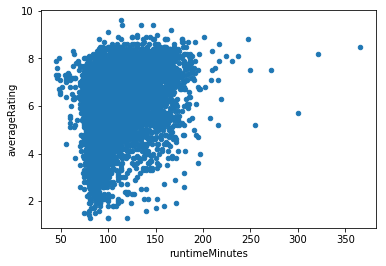

In [39]:
movies_ratings_crew_actors.plot.scatter(x='runtimeMinutes', y='averageRating')

The graph shows some relation between the movie’s runtime and the rating. It is possible to see that the movies with lower ratings (below 4) have a tendency to be under 100 minutes. However, the relationship seems to be very weak. 

#### Decision Tree

This is our table at the moment:

In [40]:
movies_ratings_crew_actors.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,successful,actor1,actor2
0,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,72509,nm0003506,nm0737216,0,nm0000212,nm0413168
1,tt0118589,Glitter,2001,104,"Drama,Music,Romance",2.2,20534,nm0193554,nm0921985,0,nm0001014,nm0073160
2,tt0118652,The Attic Expeditions,2001,100,"Comedy,Horror,Mystery",5.1,1532,nm0440948,nm0551138,0,nm0427470,nm0001293
3,tt0118694,In the Mood for Love,2000,98,"Drama,Romance",8.1,100956,nm0939182,nm0939182,1,nm0504897,nm0001041
4,tt0118852,Chinese Coffee,2000,99,Drama,7.3,3423,nm0000199,nm0507277,1,nm0000199,nm0001583


We merge the rate of all the actors, writers and directors and also calculate an average rate for the actors. After that we only keep the relevant columns:

In [41]:
df = pd.merge(movies_ratings_crew_actors, directors[['directors', 'directorRate']], on='directors')

df = pd.merge(df, writers[['writers', 'writerRate']], on='writers')

df = pd.merge(df, actors[['actors', 'successRate']], left_on='actor1', right_on='actors')
df = df.rename(columns={'successRate': 'actor1Rate'})

df = pd.merge(df, actors[['actors', 'successRate']], left_on='actor2', right_on='actors')
df = df.rename(columns={'successRate': 'actor2Rate'})

df['actorAvgRate'] = (df['actor1Rate'] + df['actor2Rate']) / 2

df = df[['runtimeMinutes', 'successful', 'directorRate', 'writerRate', 'actor1Rate', 'actor2Rate', 'actorAvgRate']]
df.head()

,runtimeMinutes,successful,directorRate,writerRate,actor1Rate,actor2Rate,actorAvgRate
0,118,0,0.571429,0.333333,0.000000,0.5,0.250000
1,96,0,0.277778,0.277778,0.277778,0.5,0.388889
2,134,1,0.714286,0.250000,0.375000,0.5,0.437500
3,104,0,0.111111,0.500000,0.375000,0.5,0.437500
4,130,1,1.000000,1.000000,0.714286,0.5,0.607143


Splits the data into a training and testing set:

In [42]:
successful_data = df.successful
X_train, X_test, y_train, y_test = train_test_split(df[['runtimeMinutes', 'directorRate', 'writerRate', 'actorAvgRate']], successful_data, test_size=0.25)
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

Our training data has 3053 rows
Our test data has 1018 rows


In [43]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Compares the prediction with the correct answer:

In [44]:
sample = X_test.head(15)
sample['successful'] = classifier.predict(sample)
sample = sample.rename(columns={'successful': 'predictSuccessful'})
correct = pd.Series(y_test, name='correctSuccessful').head(15)
pd.concat([sample, correct], axis=1)

,runtimeMinutes,directorRate,writerRate,actorAvgRate,predictSuccessful,correctSuccessful
2745,156,1.000000,0.571429,0.349206,1,1
1586,130,0.000000,0.000000,0.303571,0,0
30,94,0.125000,0.000000,0.166667,0,0
2814,96,0.500000,0.000000,0.142857,0,0
102,118,0.555556,0.111111,0.297203,0,1
775,144,0.875000,0.800000,0.469697,1,1
85,96,0.000000,0.333333,0.211823,0,0
460,110,0.000000,0.250000,0.171429,0,0
1198,90,0.000000,0.000000,0.181818,0,0
699,89,0.000000,0.000000,0.083333,0,0


In [45]:
#Optional code to point at Graphviz on remote desktop-computers:
!set PATH=PATH;C:/Program Files (x86)/Graphviz2.38/bin/
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [46]:
#Optional code to be able to export the decision tree:
"""
!pip install pydotplus
from io import StringIO
dotfile = StringIO()
"""

'\n!pip install pydotplus\nfrom io import StringIO\ndotfile = StringIO()\n'

#### Create the decision tree

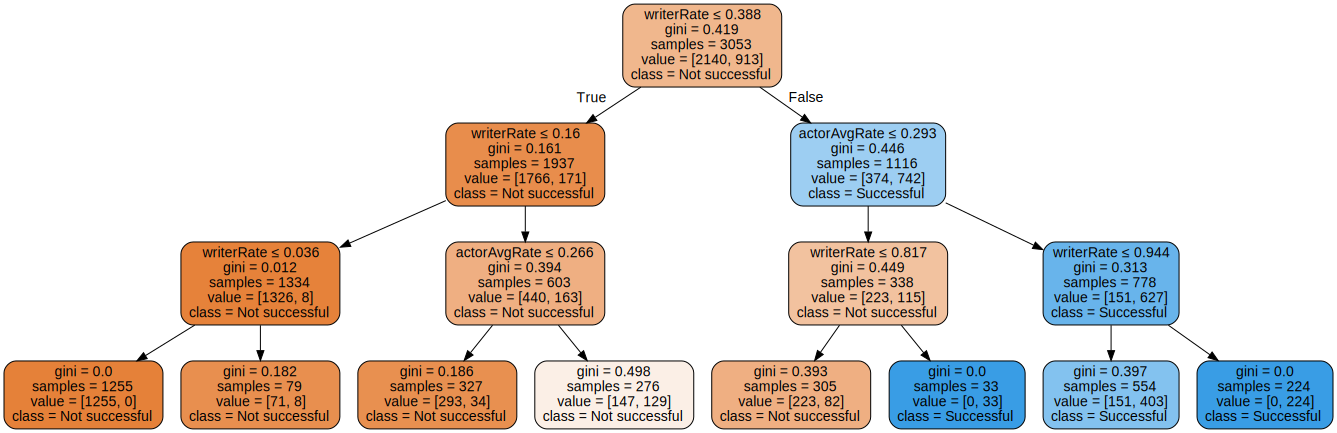

In [47]:
#Replace out_file=None below with out_file=dotfile to be able to export
tree_plot = Source(tree.export_graphviz(classifier, out_file=None, 
                            feature_names=X_train.columns, class_names=['Not successful', 'Successful'], 
                            filled=True, rounded=True, special_characters=True))
tree_plot

This decision tree shows that the attributes that have an impact on whether the movie is going to be classified as successful are writers and actors.

In [48]:
#Optional code to export the decision tree:
"""
import pydotplus
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dtree.png")
"""

'\nimport pydotplus\ngraph = pydotplus.graph_from_dot_data(dotfile.getvalue())\ngraph.write_png("dtree.png")\n'

Calculates the accuracy score:

In [49]:
pred = classifier.predict(X_test)
true = y_test
accuracy_score(true, pred)

0.8664047151277013

As shown here, the accuracy score is around 0.80, that is, 80%. This indicates that the decision tree is doing a correct prediction on almost all of the movies (1.0 or 100% is absolutely correct). 


## 5. Evaluation of results

The final result of the analysis is the decision tree with an accuracy score of about 80%. The results are compared with the hypothesis below.

#### Running time
The running time was not expected to be an important factor for the success of a movie, and the result showed that it was correct. The running time is not an important factor since it is not even included in the tree. That the time is not an important factor can also be understood from the graph, plotting the relation between runtime and average movie rating.

#### Writers
The writers-attribute was an uncertainty if they would be an important factor for the success of a movie. There are no previous studies regarding this and thereby the expectation was that the writers would not be important for success. The results, however, contradicts the hypothesis by showing that this is the most important factor for success. The root node of the tree checked the rating of the writer which means it was most important. As seen in the tree, there is just one movie with a writer rating below 0,367 that is successful. This means that with a bad writer it is very difficult to create a successful movie.

#### Actors
The actors of a movie were expected to be the most important factor for the success of a movie, based on the measurement of “star buzz”. However, the results are not in line with the hypothesis regarding the actors being the most important factor. However, it appeared still be important. According to the tree, even though the writer has good rating, the average actor rate needs to be higher than 0,254 to get the greatest chances of success.

#### Director
The director of a movie was expected to be one of the most important factors for success. However, it turned out not to be as important. The decision tree does not mention the director rating.

#### Accuracy score
The accuracy score of the decision tree is about 80% (+/- depending on the split between training and test data).  Even though the score is pretty good, there are some factors that might have affected it. One of them might be that the attributes used in the analysis are few and quite similar to each other, which makes the selection of questions that the tree can ask becomes quite simple and the range of options becomes restricted. 

#### Conclusion
According to the hypothesis, actors and directors of movies were expected to be the most important factors for making a movie successful. The decision tree, however, shows a bit different result. According to it, the writer is the most important single attribute, but it is the combination of a good writer and good actors that will increase the chances to a successful movie’s the most. If the movie has a low rated writer its chances of being successful are almost nonexistent. Even if the movie has good rated writer the actor rating needs to be good to have the best chances of success. 

Another conclusion that can be drawn from the decision tree is that the running time and director do not have a greater impact on a movie's chances to succeed. This conclusion can be drawn since both of them are never mentioned in the tree.

The final conclusion is that it is possible to say that a movie with a high rated writer and actors increase the chances of making a highly rated movie. Even though it is not with complete certainty that the movie will be high rated just by taking these aspects into the creation, this is something that the movie production company could act on. It is possible to find writers and actors that have a good rating but might not be that famous yet, and therefore they might not be too expensive yet. 

To get a better and more accurate result, the future work should take into account other important factors such as movie genres, descriptions, user reviews and profitability.

## 6. Schedule and description of project plan

The project plan for the project beyond this pilot study is based on the CRISP-DM model, showing the steps for best practice in data mining.

<img src="CRISP-DM.png" height="300px" width="300px">

*Figure 1: Phases of the CRISP-DM reference model*

#### Business Understanding
The first step is to get an understanding of the business, the organisation and the environment.  In this case, it is about to get an understanding of the movie production business and to see what criteria that can be considered as a successful movie. What factors that will be considered as a successful data mining result should also be decided in this step. 

This step is quite challenging since the movie production business is a very subjective domain and in advance, it is very difficult to predict without proper knowledge in the area. The ratings at a site as IMDb is also very hard to understand the reasons for which they are made. A movie is based on creativity and for this, it requires great knowledge about this to understand what makes a movie good from a creator's perspective. To make a good analysis it’s important to understand what potential factors that should be analysed. By only using ratings from IMDb the analysis gets very restricted to those attributes provided and are not adapted to what really “should” be analysed, therefore this step is somewhat skipped in the pilot study.

For the real project, some more time should be spent at this step to better figure out what should be analysed to improve the results.

The estimated time for this will be approximately 15 % of the total time of the project.

#### Data Understanding
In this step, the data should be collected, described, verified and initially analysed. The data used in the pilot study is collected from IMDb. This data was perfect for an initial study but when the project is to be scaled up, additional and other types of data should be collected. Such as movie genres, descriptions, user reviews and profitability. By increasing the business understanding it will get clearer what different types of data that should be collected.

When knowing what type of data is needed, it should not be too time-consuming to collect it and understand it. 

The estimated time for this will be approximately 20 % of the total time of the project.

#### Data Preparation
The preparation involves the selection and cleaning of the data. 
This will be a very time-consuming part of the project as finding out in the pilot study. The preparation step is very correlated to the modelling step. Once a model is produced some observations can be made to go back and tune the data to get better results. This is then iterated several times before getting to the final result.

The estimated time for this will be approximately 25 % of the total time of the project.

#### Modelling
The modelling step is where the actual models are created from the data provided. This is done by selecting a proper data mining method, in our case classification and a decision tree. The method chosen was very well fit for the purpose of the project and should still be used in the future project. 

This step as mentioned before is very time-consuming, together with the data preparation step. Once a model is created it will be helpful to make observations to go back and tune the data for improving the results of the models.

The estimated time for this will be approximately 15 % of the total time of the project.

#### Evaluation
This is about evaluating the results from the data mining. If the two previous steps are done properly, the evaluation should neither be too difficult nor time-consuming. If the data preparation and modelling is not done properly it will be very difficult to draw good conclusions.

The estimated time for this will be approximately 10 % of the total time of the project.

#### Deployment
A plan for the deployment should be created as well as a plan for maintenance. This plan will vary depending on the results of the project. The deployment part of this project should not be too difficult due to the factor that a movie will be created either way. The biggest cause that could potentially hinder the conclusion of the analysis from being used is the budget. If the conclusion would be to use the most expensive writers, actors or directors it could not be possible to implement the plan. This is considered an edge case and the purpose of the analysis is to achieve success without exceeding the budget. Therefore the first steps should be done properly according to this.


The estimated time for this will be approximately 5 % of the total time of the project.

## 7. Ethical aspects that need to be considered

Since this report is analysing the data from movies and their ratings, it does not process any personal data which can be backed up to extract information about any specific individual who made a review. In addition, the actual information about the movies does not contain any personal information that could be harmful to anyone from an ethical perspective. 

Even though the information does not contain any type of personal information that could be harmful to any individual, there are a few other aspects that should be reflected.

One of them is whether this type of analysis could hamper creativity in the creation of new movies. It might be good to with the help of data and statistics from older movies and analysing these for prediction of how new movies should be produced. What could happen, is that if all new movies are going to be created on the basis of what made earlier movies good rated and famous. The movie industry could be stuck in a pattern where the creativity, that is the most fundamental factor in the creation of new movies, will be limited due to the use of data analysis instead. In the long run, this could lead to the whole movie industry being affected negatively due to the new pattern of creating movies are based on earlier movies.

Another aspect is whether the analysis will be biased by human decisions made in the preprocessing of the data. E.g. which tables that will be used or not. To make the data manageable, some important decisions must be taken by a human. By doing this though, some information will be left out and it will not know whether it was important or not for the analysis. Under perfect circumstances to make such an objective analysis as possible, all data should be used in the analysis or at least be sorted out by the computers and not actively by humans. People make much more subjective assessments than computers and even though the computer itself makes an objective assessment, it becomes indirectly subjective if a subjective assessment forms the basis for it.

Lastly, the data that is being collected and used from IMDb could be misleading without knowing about it. Since the reviews are made somewhat anonymously this might lead to the reviews being incorrect and may be made for purposes other than just giving their objective opinion about the movie. This, for example, could be some political opinions that a person may have. If a movie is about politics and the people who review the movie are either for or against the person or political issue discussed in the movie, it may tend to give the movie either the lowest or highest rating without giving the movie itself an honest review.

## References

Craig Batty (2015) *A screenwriter's journey into theme, and how creative writing research might help us to define screen production research*, Studies in Australasian Cinema, 9:2, pp. 110-121

imdb.com (-), *Press Room*. Available at: https://www.imdb.com/pressroom/about/ [Accessed 19 Nov. 2018].

imdb.com (2018), [online] Available at: https://datasets.imdbws.com/ [Accessed 22 Nov. 2018].

Meenakshi, K., Maragatham, G., Agarwal, N. and Ghosh, I. (2018). *A Data mining Technique for Analyzing and Predicting the success of Movie*. Journal of Physics: Conference Series, 1000, p.012100.

Oliver, M. B. & Hartman, T. (2010). *Exploring the Role of Meaningful Experiences in Users' Appreciation of “Good Movies”*. Berghahn Journals,Vol. 4, Issue 2, pp 128–150

Rasoul Safavian, S., Landgrebe, D. (1991), *Transactions on Systems, Man and Cybernetics*, vol. 21, NO. 3, pp. 360-674. 

Sharda, R. and Delen, D. (2006). *Predicting box-office success of motion pictures with neural networks*. Expert Systems with Applications 30. Stillwater, Oklahoma, pp.243–254.

Tan P-N., Steinbach, M., Kumar,V. (2014), *Introduction to Data Mining*, 1st ed, 7th ed., Harlow: Pearson

Valenti, J. (1978). *Motion Pictures and Their Impact on Society in the Year
2001*, speech given at the Midwest Research Institute, Kansas City,
April 25, p. 3.

Wu, X., Zhu, X., Wu, G. and Ding, W. (2014). *Data Mining with Big Data*. Transactions on knowledge and data engineering. IEEE, pp. 97-107.


